In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *
plt.rcParams['figure.figsize']=[32,18]

In [2]:
countries=['EN','ES','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

In [3]:
utd=seasons['EN'].Teams['Man United']
city=seasons['EN'].Teams['Man City']
tot=seasons['EN'].Teams['Tottenham']
chel=seasons['EN'].Teams['Chelsea']
barca=seasons['ES'].Teams['Barcelona']
rm=seasons['ES'].Teams['Real Madrid']
pool=seasons['EN'].Teams['Liverpool']

In [4]:
seasons['EN'].all.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
240,2018-01-30,Huddersfield,Liverpool,0,3
241,2018-01-30,Swansea,Arsenal,3,1
242,2018-01-30,West Ham,Crystal Palace,1,1
243,2018-01-31,Chelsea,Bournemouth,0,3
244,2018-01-31,Everton,Leicester,2,1
245,2018-01-31,Man City,West Brom,3,0
246,2018-01-31,Newcastle,Burnley,1,1
247,2018-01-31,Southampton,Brighton,1,1
248,2018-01-31,Stoke,Watford,0,0
249,2018-01-31,Tottenham,Man United,2,0


In [5]:
for _season in seasons:
    print(_season.url)
    _season.calibrate()

http://www.football-data.co.uk/mmz4281/1718/E0.csv
http://www.football-data.co.uk/mmz4281/1718/SP1.csv
http://www.football-data.co.uk/mmz4281/1718/N1.csv


In [6]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [16]:
seasons['EN'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Relegated,Win,lambda,tau
Man City,29.27,111.50,100.08,100.000,18,73,68,0.000,99.982,2.320,0.204
Man United,30.56,73.75,78.93,91.668,18,49,53,0.000,0.011,1.237,0.202
Liverpool,41.40,87.67,78.65,91.153,29,57,50,0.000,0.007,1.650,0.317
Chelsea,32.01,66.87,74.03,56.147,19,45,50,0.000,0.000,1.090,0.222
Tottenham,35.47,74.93,73.88,58.987,22,49,48,0.000,0.000,1.320,0.233
Arsenal,51.99,70.51,64.25,2.042,34,46,42,0.000,0.000,1.206,0.649
Leicester,50.53,56.26,54.14,0.001,34,37,34,0.002,0.000,0.835,0.596
Burnley,33.80,33.09,54.08,0.002,22,20,35,0.001,0.000,0.282,0.176
Everton,61.22,42.77,45.37,0.000,40,28,31,1.930,0.000,0.435,0.927
Bournemouth,54.68,43.74,44.20,0.000,36,28,28,2.969,0.000,0.581,0.781


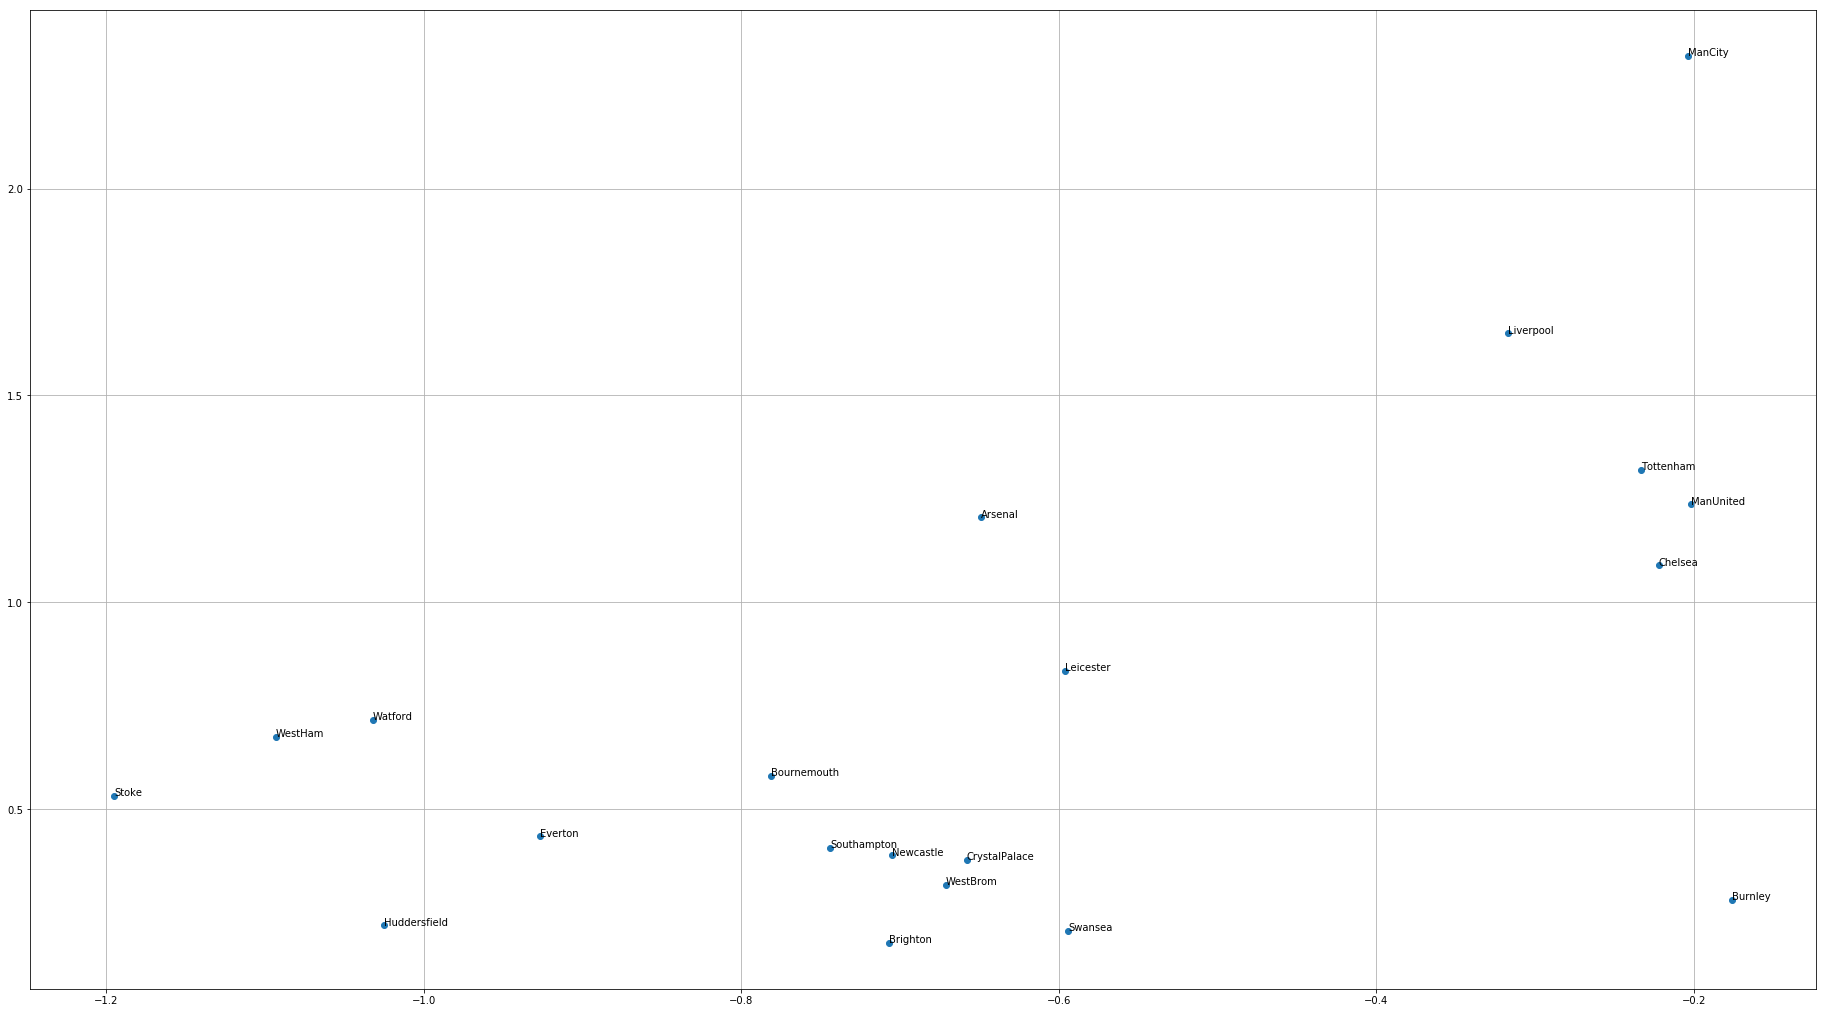

In [17]:
for ssn in ['EN']:
    results=seasons[ssn].get_all_results()
    x=-results['tau']
    y=results['lambda']
    nms=list(results.index)
    plt.scatter(x,y)
    for i, txt in enumerate(nms):
        plt.annotate(txt.replace(' ',''), (x[i],y[i]))    
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(32,18)
plt.savefig('ratings.pdf')

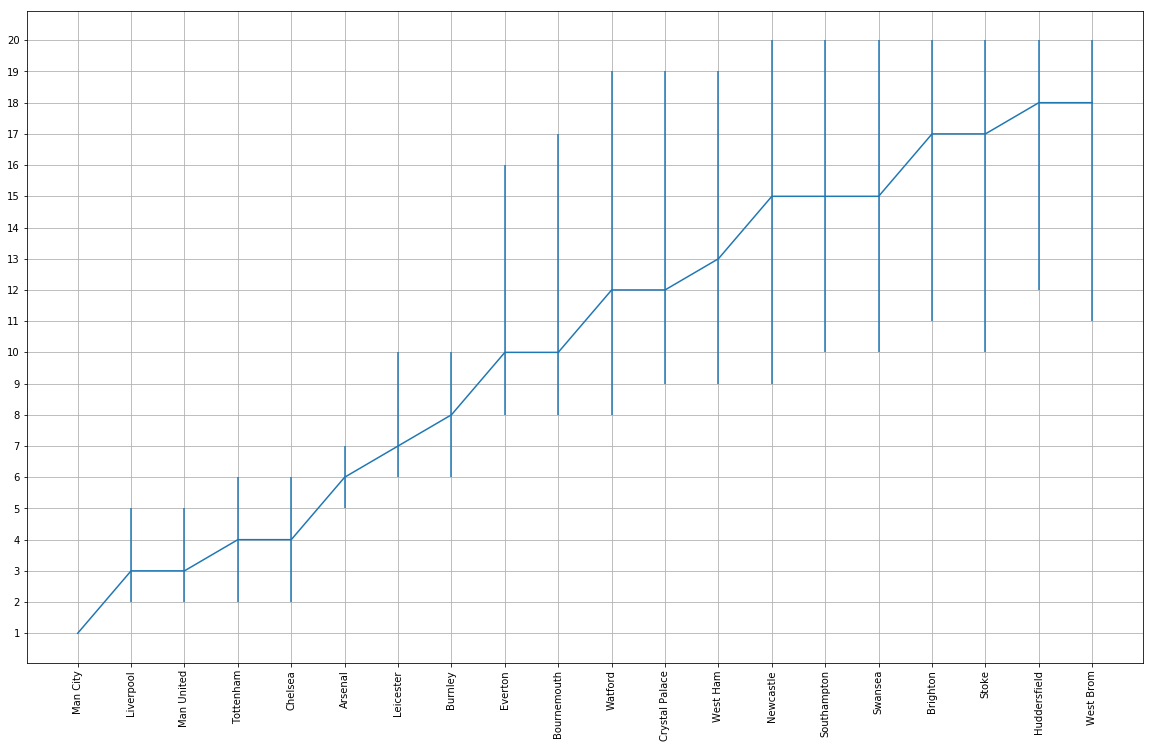

In [9]:
seasons['EN'].conf_int_plot(95,kind='')

In [11]:
pool + city

array([ 0.2721,  0.1849,  0.543 ])

In [12]:
utd+tot 

array([ 0.3764,  0.2322,  0.3914])

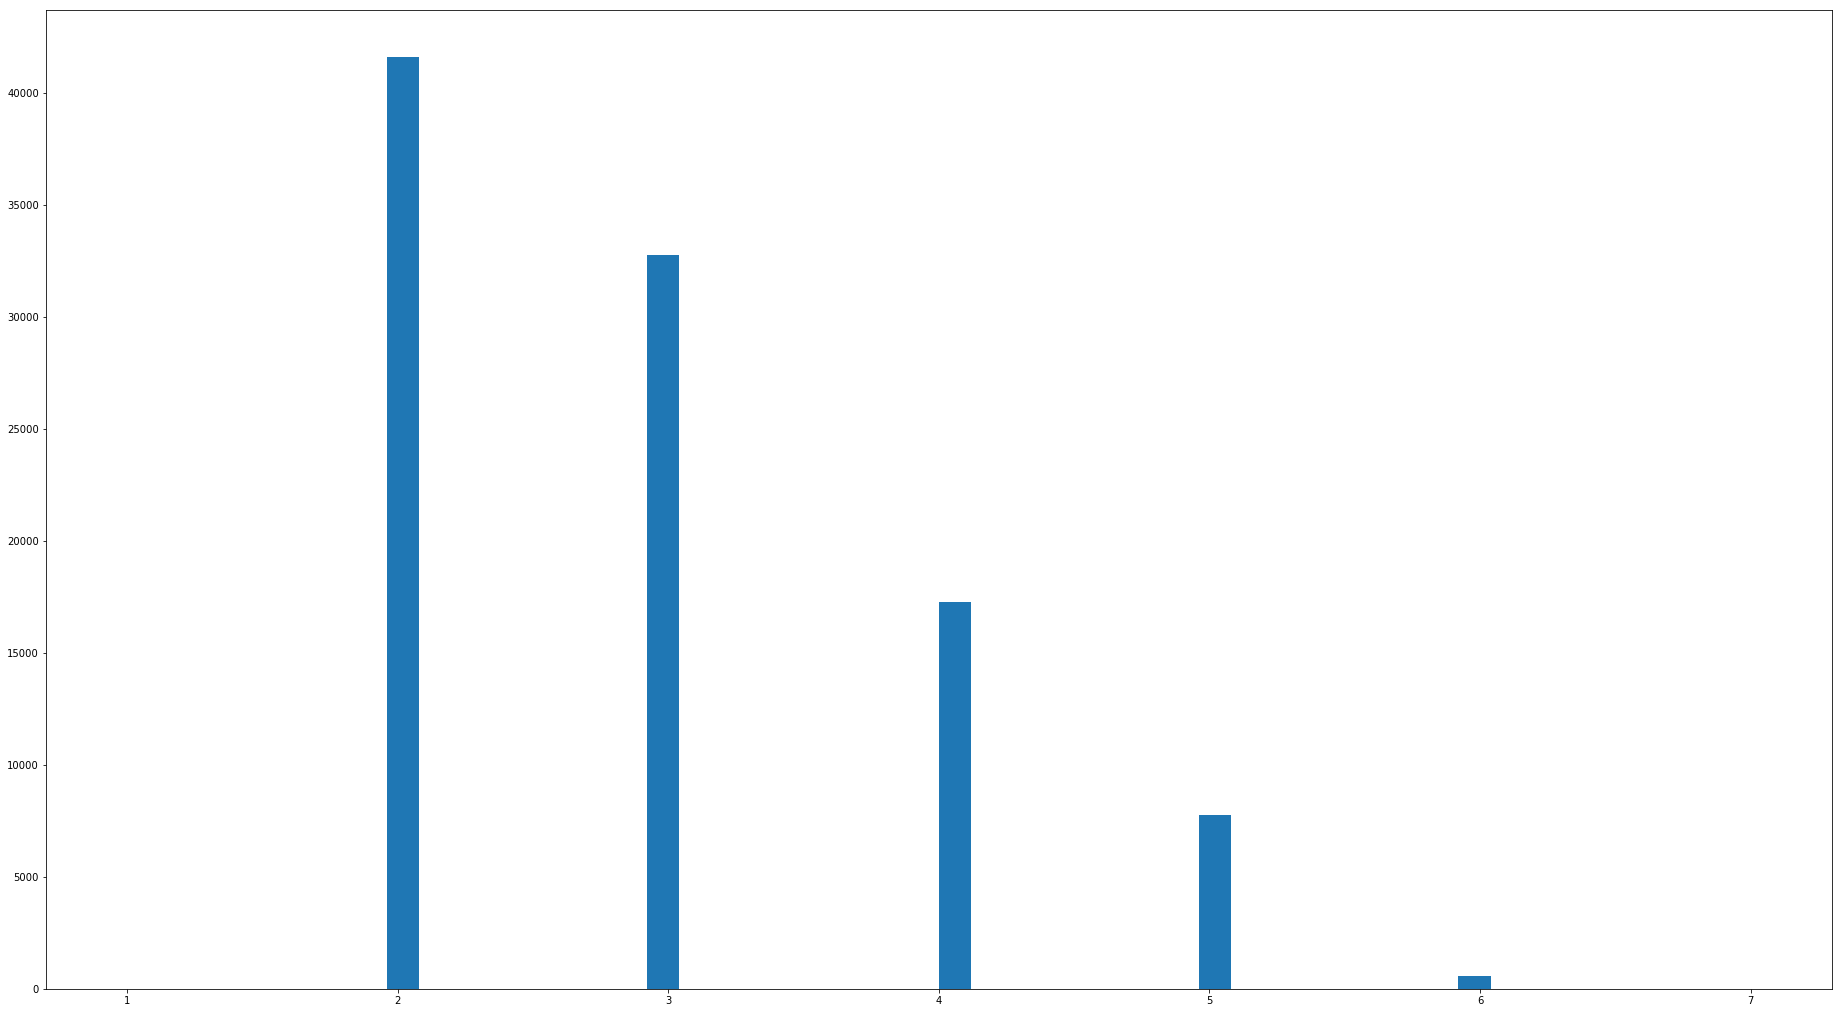

In [13]:
plt.hist(utd.place_scenarios,50);

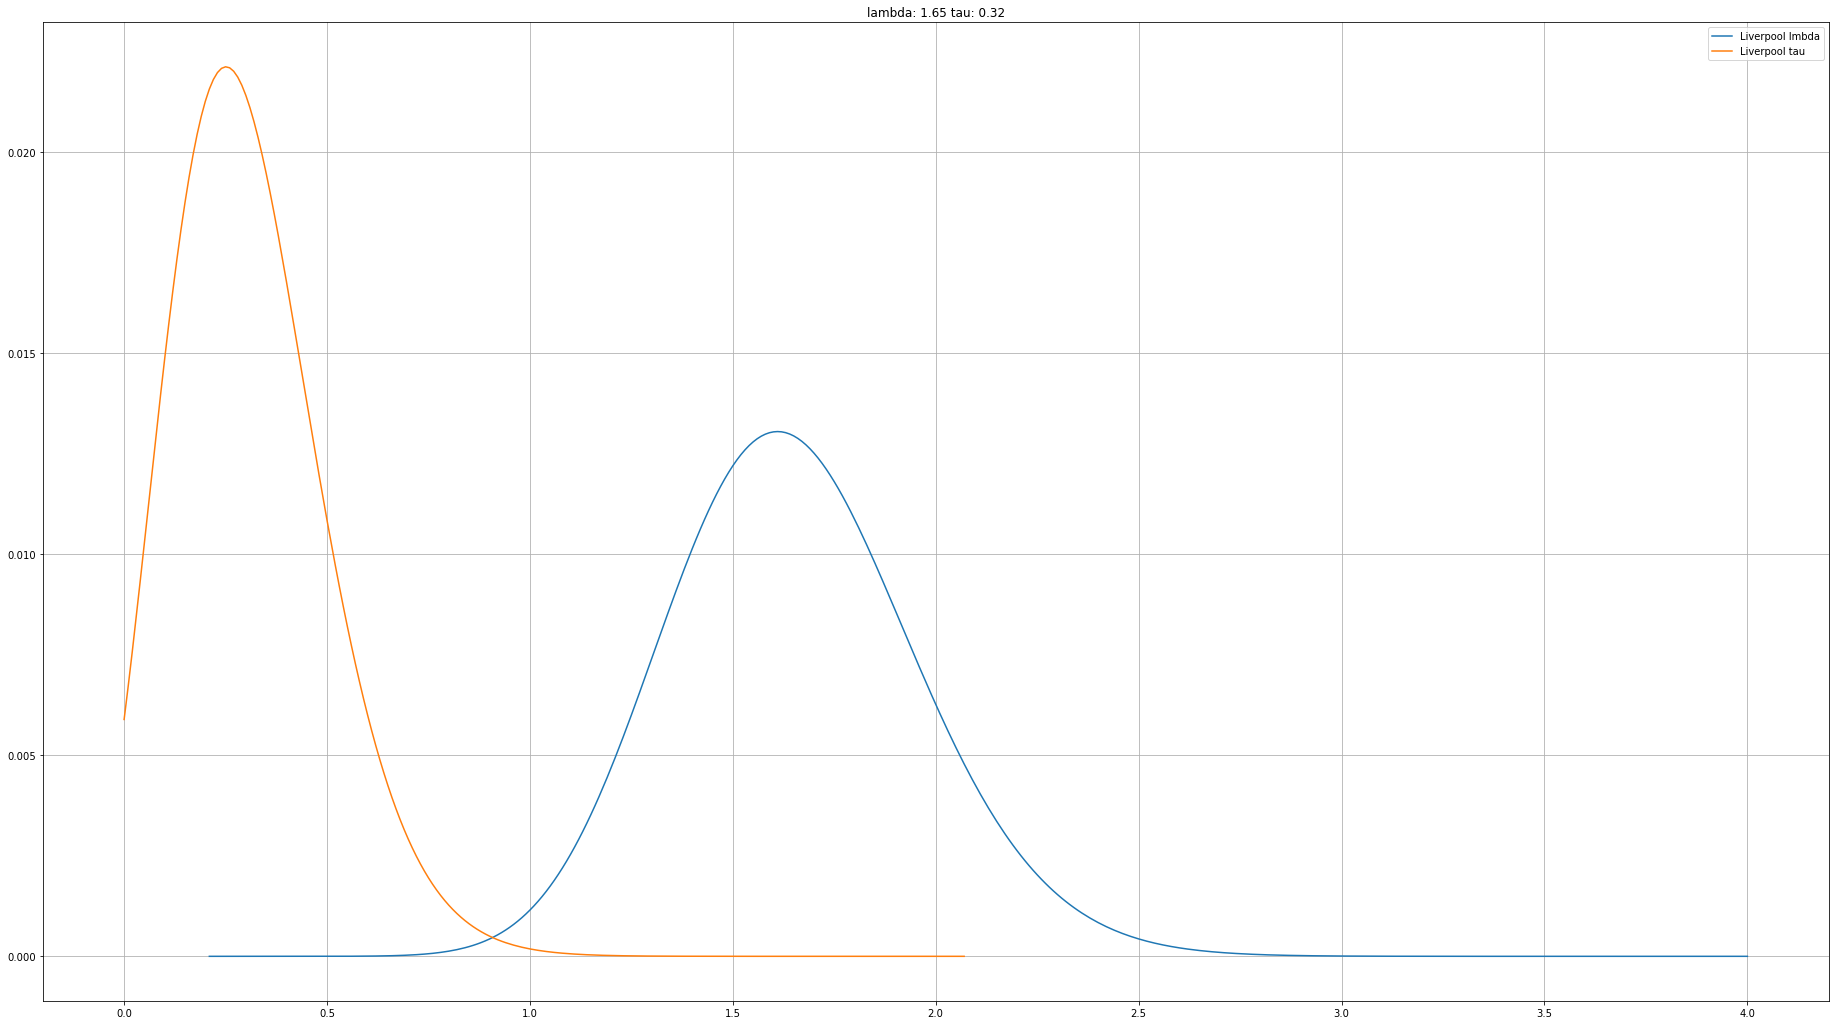

In [14]:
pool.plt()

In [15]:
(utd.place_scenarios>=5).sum()

8332